<a href="https://colab.research.google.com/github/Harshitaa63/myprojects/blob/main/CAR_MBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installing Necessary Libraries
! pip install pandas
! pip install numpy
! pip install numpy
! pip install gradio
! pip install mlxtend


In [2]:
#load and inspect the data
import pandas as pd

# Load the dataset
df = pd.read_csv('CarPrice_Assignment.csv')

# Display the first few rows
print(df.head())

# Select relevant columns
df_selected = df[['CarName', 'fueltype', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber']]
# Convert to string format
df_selected = df_selected.apply(lambda x: x.astype(str))

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [4]:
# Format the data for Market Basket Analysis
from mlxtend.preprocessing import TransactionEncoder

# Convert data into list format for TransactionEncoder
transactions = df_selected.values.tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [5]:
#Apply Aprori Algorithm
from mlxtend.frequent_patterns import apriori, association_rules

# Find frequent item sets
frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display association rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

     antecedents                  consequents   support  confidence      lift
0          (fwd)                       (four)  0.541463    0.925000  1.192610
1         (four)                        (fwd)  0.541463    0.698113  1.192610
2         (four)                        (gas)  0.702439    0.905660  1.003570
3          (gas)                       (four)  0.702439    0.778378  1.003570
4    (hatchback)                       (four)  0.278049    0.814286  1.049865
..           ...                          ...       ...         ...       ...
231        (gas)  (fwd, ohc, hatchback, four)  0.214634    0.237838  1.083483
232  (hatchback)        (fwd, ohc, gas, four)  0.214634    0.628571  1.385561
233        (fwd)  (hatchback, ohc, gas, four)  0.214634    0.366667  1.473856
234        (ohc)  (fwd, hatchback, gas, four)  0.214634    0.297297  1.296722
235       (four)   (fwd, hatchback, ohc, gas)  0.214634    0.276730  1.289308

[236 rows x 5 columns]


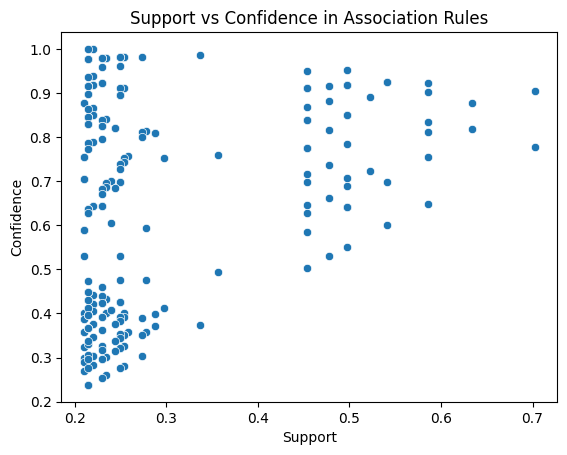

In [6]:
#Visualize Market Basket Analysis
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=rules['support'], y=rules['confidence'])
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support vs Confidence in Association Rules")
plt.show()

In [8]:
import gradio as gr
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset once at the start
df = pd.read_csv("CarPrice_Assignment.csv")  # No need for user upload

# Function to filter data based on user selection
def analyze_car_data(feature, value, min_support, min_confidence):
    df_selected = df[['CarName', 'fueltype', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber']]
    df_selected = df_selected.apply(lambda x: x.astype(str))

    # Apply user filter
    if feature and value:
        df_selected = df_selected[df_selected[feature] == value]

    # Convert data to transaction format
    transactions = df_selected.values.tolist()
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

    # Apply Apriori algorithm
    frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

    return rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

# Gradio interface with filters
interface = gr.Interface(
    fn=analyze_car_data,
    inputs=[
        gr.Dropdown(["fueltype", "carbody", "drivewheel", "enginetype", "cylindernumber"], label="Select Feature"),
        gr.Textbox(label="Enter Filter Value (e.g., 'gas', 'sedan')"),
        gr.Slider(0.1, 1.0, step=0.05, label="Minimum Support"),
        gr.Slider(0.1, 1.0, step=0.05, label="Minimum Confidence")
    ],
    outputs=gr.Dataframe(label="Filtered Association Rules"),
    title="Car Feature Market Basket Analysis",
    description="Explore car attribute associations using filters—no need to upload a dataset!"
)

# Launch Gradio app
interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cab969f5d45902f622.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
